In [5]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from tqdm.notebook import tqdm
import concurrent.futures

In [2]:
import sys
sys.path.append('../')
from corrfunc import compute_corr, C

In [3]:

def generate_Cls(nmax=25):
    return [np.sin(x) for x in np.linspace(0,1,nmax)]

In [6]:
def plot_Cls(Cls, nside_out=256, plot_corr=False):
    
    m = hp.synfast(Cls, nside_out, new=True)
    x = np.linspace(1,20,100)
    y = [C(theta, Cls) for theta in x]
    
    if plot_corr:
        x_corr = np.linspace(1,20, 15)
        thicknesses = np.append(x_corr[1:]-x_corr[:-1], x_corr[-1]-x_corr[-2])
        def compute_corr_wrap(p):
            return compute_corr(*p)
        with concurrent.futures.ProcessPoolExecutor() as executor:
            args = ((m,m,R,dr) for R, dr in zip(x_corr, thicknesses))
            out = list(executor.map(compute_corr_wrap, args))
            y_corr, err_corr = zip(*out)
        
    plt.figure(figsize=(8,6))
    if plot_corr:
        plt.errorbar(x_corr, list(y_corr), yerr=list(err_corr), label='compute_corr')
    plt.plot(x,y, label='legendre')
    plt.xlabel('Degrees')
    plt.ylabel('Correlation')
    
    return

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


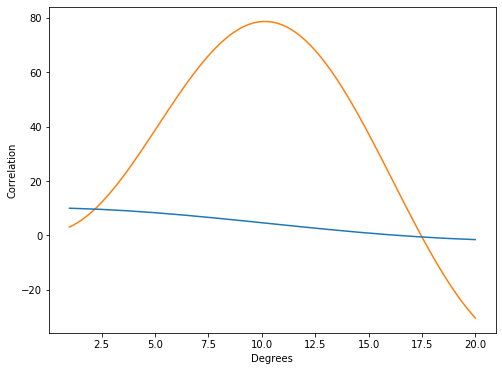

In [33]:
plot_Cls([np.sin(x) for x in np.linspace(0,4.4,20)], plot_corr=True)